In [57]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional



import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import neattext.functions as nfx
import warnings
warnings.filterwarnings('ignore')


#https://www.kaggle.com/code/pashupatigupta/starter-notebook-a-to-z-emotion-detection

In [58]:
#df=pd.read_csv('dataset/isear.csv')
#df=pd.read_csv('dataset/emotion-stimulus.csv')
#df=pd.read_csv('dataset/dailydialog.csv')
df=pd.read_csv('dataset/text_emotion.csv')

In [59]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [60]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [61]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [64]:

df['Clean_Text']=df['content'].apply(nfx.remove_special_characters)

In [65]:
df['Clean_Text']=df['content'].apply(nfx.remove_punctuations)

In [66]:
df['Clean_Text']=df['content'].apply(nfx.remove_stopwords)

In [67]:
df['Clean_Text']=df['content'].apply(nfx.remove_userhandles)

In [69]:
df[['content','Clean_Text']]

,content,Clean_Text
0,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day All my love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...


In [70]:
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Logging
import logging
logging.basicConfig(level=logging.INFO)

In [71]:
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    
    f = open("glove.6B.50d.txt", encoding='utf-8')
    for line in f:
        try:
            values = line.split()
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
            except:
                pass
            embeddings_index[word] = coefs
        except UnicodeDecodeError:
            pass
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index, tokenizer)

In [83]:
def Build_Model_RNN_Text(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=60, EMBEDDING_DIM=50, dropout=0.2):
    # Model building
    model = Sequential()
    hidden_layer = 2
    lstm_node = 64
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(lstm_node)
    for i in range(0,hidden_layer):
        model.add(Bidirectional(LSTM(lstm_node,return_sequences=True, recurrent_dropout=0.5)))
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.5)))
    model.add(Dropout(dropout))
    #model.add(TimeDistributed(Dense(256)))
    #model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

In [84]:
def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1 = (2*(precision*recall))/(precision+recall)
    return {
        "mcc": mcc,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "pricision" : precision,
        "recall" : recall,
        "F1" : f1,
        "accuracy": (tp+tn)/(tp+tn+fp+fn)
    }

def compute_metrics(labels, preds):
    assert len(preds) == len(labels)
    return get_eval_report(labels, preds)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

def class_balance(df, target):
  cls = df[target].value_counts()
  cls.plot(kind='bar')
  plt.show()

In [85]:
preprocess = True
text = 'Clean_Text'
target = 'sentiment'
MAX_SEQUENCE_LENGTH = 60

In [86]:
train_final = df[['Clean_Text', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,Clean_Text,sentiment
0,i know i was listenin to bad habit earlier ...,2
1,Layin n bed with a headache ughhhh...waitin o...,10
2,Funeral ceremony...gloomy friday...,10


In [87]:
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])

## df for training and prediction
df = train_final

In [88]:

from sklearn.model_selection import train_test_split

X = df[text]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Generating Glove Embeddings...")
X_train_Glove,X_test_Glove, word_index,embeddings_index, tokenizer = loadData_Tokenizer(X_train,X_test, MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)

Generating Glove Embeddings...
Found 33245 unique tokens.
(40000, 60)
Total 400000 word vectors.


In [89]:
with warnings.catch_warnings():
    print("Building Model ...")
    model_RNN = Build_Model_RNN_Text(word_index,embeddings_index, 60)
    model_RNN.summary()
    print("\n Starting Training ... \n")
    history = model_RNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=3,
                              batch_size=2,
                              verbose=1)
    warnings.simplefilter("ignore")

Building Model ...
64
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 50)            1662300   
                                                                 
 bidirectional_6 (Bidirectio  (None, 60, 128)          58880     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 60, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 60, 128)          98816     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 60, 128)           0         
                                                                 
 bidirectional_8 (Bidirectio  (N


 Plotting results ... 



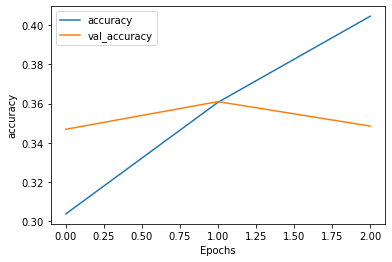

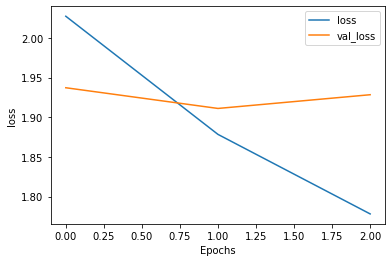


 Evaluating Model ... 



In [ ]:


#print(predicted)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

print("\n Plotting results ... \n")
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
print("\n Evaluating Model ... \n")




predicted = model_RNN.predict(X_test_Glove)
predict_classes=np.argmax(predicted,axis=1)
                        
print('Confusion Matrix')
print(metrics.classification_report(y_test, predict_classes))

In [47]:
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [55]:
predictions = model_RNN.predict(X_test_Glove)
predictions_proba = model_RNN.predict_proba(X_test_Glove)



#y_pred = model_RNN.predict(X_test_Glove)

#roc_auc_score(y_test,y_pred,multi_class="ovr")

AttributeError: 'Sequential' object has no attribute 'predict_proba'